<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C4/C4.html"><img src="../data/C4_nav.png" width="100"  style="float:right;" alt="C4"></a>
<h1>Music Structure Analysis: General Principles</h1> 
</div>

<br/>

<p>
Following Section 4.1 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we discuss in this notebook general principles for segmenting and structuring music recordings. For an overview, we also refer to the following literature.

<ul>
<li><span style="color:black">
Jouni Paulus, Meinard Müller, and Anssi Klapuri: <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/publications/2010_PaulusMuellerKlapuri_STAR-MusicStructure_ISMIR.pdf"><strong>Audio-based Music Structure Analysis.</strong></a> Proceedings of the International Conference on Music Information Retrieval (ISMIR), Utrecht, The Netherlands, pp. 625–636, 2010.
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_PaulusMK10_MusicStructure-STAR_ISMIR.txt"> Bibtex </a>
</span></li>
<li><span style="color:black">
Juan P. Bello, Peter Grosche, Meinard Müller, and Ron J. Weiss: <strong>Content-based Methods for Knowledge Discovery in Music.</strong> In Rolf Bader (ed.): Springer Handbook on Systematic Musicology, Springer, Berlin, Heidelberg: 823–840, 2018.
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_BelloGMW18_MusicKnowledgeDiscovery_Springer.txt"> Bibtex </a>
</span></li>
</ul>    
</p> 

## General Principles

Music structure analysis is a multifaceted and often ill-defined problem that depends on many different aspects. First of all, the complexity of the problem depends on the kind of [music representation](../C1/C1.html) to be analyzed. For example, while it is comparatively easy to detect certain structures such as repeating melodies in [sheet music](../C1/C1S1_SheetMusic.html), it is often much harder to automatically identify such structures in [audio representations](../C1/C1S3_Waveform.html). Second, there are various principles including **homogeneity**, **repetition**, and **novelty** that a segmentation may be based on. Third, one also has to account for different musical dimensions, such as melody, harmony, rhythm, or timbre. Finally, the segmentation and structure largely depend on the musical context and the **temporal hierarchy** to be considered. The following figure gives an overview of various aspects that need to be considered when dealing with musical structures. In the following, we discuss these aspects in more detail. In particular, our goal is to raise the awareness that computational procedures as described in the subsequent sections are often based on simplifying model assumptions that only reflect certain aspects of the complex structural properties of music. 

<img src="../data/C4/FMP_C4_F02.png" width="500px" align="middle" alt="FMP_C4_F02">

## Segmentation and Structure Analysis

The tasks of segmenting and structuring  multimedia documents are of fundamental importance not only for the processing of music signals but also for general audio-visual content. **Segmentation** typically refers to the process of partitioning a given document into multiple segments with the goal of simplifying the representation into something that is more meaningful and easier to analyze than the original document. For example, in image processing the goal is to partition a given image into a set of regions such that each region is similar with respect to some characteristic such as color, intensity, or texture. Region boundaries can often be described by contour lines or edges at which the image brightness or other properties change sharply and reveal discontinuities. In music, the segmentation task is to decompose a given audio stream into acoustically meaningful **sections** each corresponding to a continuous time  interval that is specified by a start and end **boundary**. At a fine level, the segmentation may aim to find the boundaries between individual notes or to find the beat intervals specified by beat positions. At a coarser level, the goal may be to detect changes in instrumentation  or harmony or to find the boundaries between verse and chorus sections. Also, discriminating between silence, speech, and music, finding the actual beginning of a music recording, or separating the applause at the end of a performance are typical segmentation tasks.

Going beyond mere segmentation, the goal of **structure analysis** is to also find and understand the relationships between the segments. For example, certain segments may be characterized by the instrumentation. There may be sections played only by strings. Sections played by the full orchestra may be followed by solo sections. The verse sections with a singing voice may be alternated with purely instrumental sections. Or a soft and slow introductory section may precede the main theme played in a much faster tempo. Furthermore, sections are often repeated. Most events of musical relevance are repeated in a musical work in one way or another. However, repetitions are rarely identical copies of the original section, but undergo modifications in aspects such as the lyrics, the instrumentation, or the melody. One main task of structure analysis is to not only segment the given music recording, but to also group the segments into musically meaningful categories (e.g., intro, chorus, verse, outro). 

The challenge in computational music structure analysis is that structure in music arises from many different kinds of **relationships** including **repetition**, **contrast**, **variation**, and **homogeneity**. In view of the various principles that crucially influence the musical structure, a large number of different approaches to music structure analysis have been developed. In the following, we want to roughly distinguish three different classes of methods. 

* First, **repetition-based** methods are used to identify recurring patterns.  
* Second, **novelty-based** methods are employed to detect transitions between contrasting parts. 
* Third, **homogeneity-based** methods are used to determine passages that are consistent with  respect to some musical property.  

Note that novelty-based and homogeneity-based approaches are two sides of a coin: novelty detection is based on observing some surprising event or change after a more homogeneous segment. While the aim of novelty detection is to locate the changes' time positions, the focus of homogeneity analysis lies in the identification of longer passages that are coherent with respect to some musical property. The following figure illustrates that similar segmentation and structuring principles apply for other domains such as image and 3D data.

<img src="../data/C4/FMP_C4_F03_text.png" width="400px" align="middle" alt="FMP_C4_F03_text">

## Musical Structure

To specify musical structures, we now introduce some terminology. First of all, we distinguish between a **piece of music** (in an abstract sense) and a particular **audio recording** (an actual performance) of the piece. The term **part** is used in the context of the abstract music domain, whereas the term **segment** is used for the audio domain. Musical parts are typically denoted by the capital letters $A,B,C,\ldots$ in the order of their first occurrence, where numbers (often written as subscripts) indicate the order of repeated occurrences. As an example, we consider the Hungarian Dance No. 5 by Johannes Brahms. This dance has been arranged for a wide variety of instruments and ensembles, ranging from piano versions to versions for full orchestra. The following figure shows a sheet music representation for the violin voice of an arrangement for full orchestra. 

<!--<img src="../data/C4/FMP_C4_F05.png" width="400px" align="middle" alt="FMP_C4_F05">-->
<img src="../data/C4/FMP_C4_F05_Sibelius_annotated.png" width="700px" align="middle" alt="FMP_C4_F05_Sibelius.png">


The musical structure is $A_1A_2B_1B_2CA_3B_3B_4D$, which consists of three repeating $A$-parts, four repeating $B$-parts, as well as a $C$-part and a short closing $D$-part. The $A$-part has a substructure consisting of two more or less repeating subparts. Furthermore, as becomes apparent when looking at the musical score, the middle $C$-part may be further subdivided into a substructure that may be described by $d_1d_2e_1e_2e_3e_4$. In music notation, such subparts are often indicated using small letters $a,b,c,\ldots$. 

<img src="../data/C4/FMP_C4_F28.png" width="300px" align="middle" alt="FMP_C4_F28">

## Audio Structure Analysis

Given a recording of a piece of music, the goal of **audio structure analysis** (as considered in this chapter) is to find the segments within the recording that correspond to the various parts of a musical structure. The following examples show that different performances not only may differ with regard to aspects such as instrumentation and tempo, but also with regard to the global musical structure.

Orchestral version (Ormandy, $A_1A_2B_1B_2CA_3B_3B_4D$) <br clear="all" />
<audio style="width: 320px;" src="../data/C4/FMP_C4_Audio_Brahms_HungarianDances-05_Ormandy.mp3" type="audio/mpeg" controls="controls"></audio>

Orchestral version (Fulda Symphony Orchestra, $A_1A_2B_1B_2CA_3B_3B_4D-\mathrm{Applause}$) <br clear="all" />
<audio style="width: 320px;" src="../data/C4/FMP_C4_Audio_Brahms_HungarianDances-05_FuldaSymphOrch.mp3" type="audio/mpeg" controls="controls"></audio>

Violin version (Sibelius, $A_1A_2B_1B_2CA_3B_3B_4D$) <br clear="all" />
<audio style="width: 320px;" src="../data/C4/FMP_C4_Audio_Brahms_HungarianDances-05_Sibelius-Violine.mp3" type="audio/mpeg" controls="controls"></audio>

Piano version (RWC, $A_1A_2B_1B_2CA_3B_3D$) <br clear="all" />
<audio style="width: 320px;" src="../data/C4/FMP_C4_Audio_Brahms_HungarianDances-05_RWC_RM-C022.mp3" type="audio/mpeg" controls="controls"></audio>

Orchestral version (Chaplin, $A_1A_2B_1CA_3B_2D$)

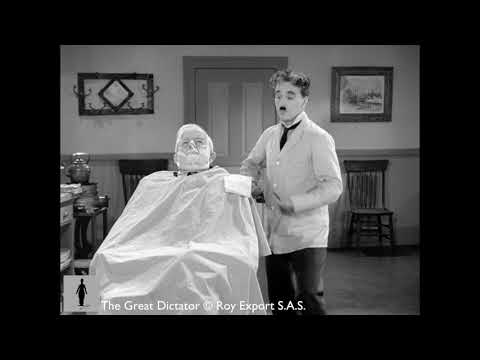

In [1]:
import IPython.display as ipd
ipd.display(ipd.YouTubeVideo('H19jByxrqlw', width=600, height=450))

## Structure Annotations

To evaluate automated approaches for audio structure analysis, one often uses **reference annotations** generated by humans in a manual process. This topic will be discussed in the [FMP notebook on evaluation](../C4/C4S5_Evaluation.html) in more detail. To store annotations, we use in the FMP notebooks a simple [CSV file format](../B/B_Annotations.html). In the following code cell, we read and visualize a reference annotations for the Ormandy recording of our Brahms example, where the time axis is specified in seconds.

When computing the musical structure using automated methods, one typically starts with converting a signal into a frame-based feature representation. As a result, the computed start and end positions of structural elements are given in **frame indices**. To compare annotations with computed results, one way is to convert the **physical time axis (specified in seconds)** of a given annotation into a **discrete time axis (specified in frame indices)**. Furthermore, one may want to adjust the label annotations, e.g., leaving out digits that indicate the order of repeated occurrences of the same part. In the next code cell, we provide such a conversion function.

Original annotations with time specified in seconds
Annotations: [[0.0, 1.01, ''], [1.01, 22.11, 'A1'], [22.11, 43.06, 'A2'], [43.06, 69.42, 'B1'], [69.42, 89.57, 'B2'], [89.57, 131.64, 'C'], [131.64, 150.84, 'A3'], [150.84, 176.96, 'B3'], [176.96, 196.9, 'B4'], [196.9, 199.64, '']]
Colors: {'A1': [1, 0, 0, 0.2], 'A2': [1, 0, 0, 0.2], 'A3': [1, 0, 0, 0.2], 'B1': [0, 1, 0, 0.2], 'B2': [0, 1, 0, 0.2], 'B3': [0, 1, 0, 0.2], 'B4': [0, 1, 0, 0.2], 'C': [0, 0, 1, 0.2], '': [1, 1, 1, 0]}


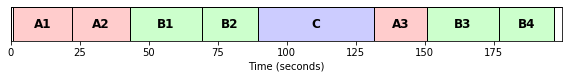

Converted annotations (Fs = 2) with reduced labels (removing digits)
Annotations: [[0, 2, ''], [2, 44, 'A'], [44, 86, 'A'], [86, 139, 'B'], [139, 179, 'B'], [179, 263, 'C'], [263, 302, 'A'], [302, 354, 'B'], [354, 394, 'B'], [394, 399, '']]
Colors: {'A': [1, 0, 0, 0.2], 'B': [0, 1, 0, 0.2], 'C': [0, 0, 1, 0.2], '': [1, 1, 1, 0]}


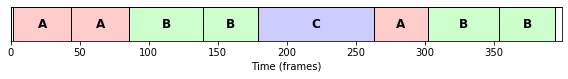

In [2]:
import numpy as np
import os, sys, librosa
from scipy import signal
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import IPython.display as ipd
import pandas as pd


sys.path.append('..')
import libfmp.b
import libfmp.c2
import libfmp.c3
import libfmp.c4
import libfmp.c6

%matplotlib inline

def convert_structure_annotation(ann, Fs=1, remove_digits=False, index=False):
    """Convert structure annotations

    Notebook: C4/C4S1_MusicStructureGeneral.ipynb

    Args:
        ann (list): Structure annotions
        Fs (scalar): Sampling rate (Default value = 1)
        remove_digits (bool): Remove digits from labels (Default value = False)
        index (bool): Round to nearest integer (Default value = False)

    Returns:
        ann_converted (list): Converted annotation
    """
    ann_converted = []
    for r in ann:
        s = r[0] * Fs
        t = r[1] * Fs
        if index:
            s = int(np.round(s))
            t = int(np.round(t))
        if remove_digits:
            label = ''.join([i for i in r[2] if not i.isdigit()])
        else:
            label = r[2]
        ann_converted = ann_converted + [[s, t, label]]
    return ann_converted


get_color_for_annotation_file = libfmp.c4.get_color_for_annotation_file

def read_structure_annotation(fn_ann, fn_ann_color='', Fs=1, remove_digits=False, index=False):
    """Read and convert structure annotation and colors

    Notebook: C4/C4S1_MusicStructureGeneral.ipynb

    Args:
        fn_ann (str): Path and filename for structure annotions
        fn_ann_color (str): Filename used to identify colors (Default value = '')
        Fs (scalar): Sampling rate (Default value = 1)
        remove_digits (bool): Remove digits from labels (Default value = False)
        index (bool): Round to nearest integer (Default value = False)

    Returns:
        ann (list): Annotations
        color_ann (dict): Color scheme
    """
    df = libfmp.b.read_csv(fn_ann)
    ann = [(start, end, label) for i, (start, end, label) in df.iterrows()]
    ann = convert_structure_annotation(ann, Fs=Fs, remove_digits=remove_digits, index=index)
    color_ann = {}
    if len(fn_ann_color) > 0:
        color_ann = get_color_for_annotation_file(fn_ann_color)
        if remove_digits:
            color_ann_reduced = {}
            for key, value in color_ann.items():
                key_new = ''.join([i for i in key if not i.isdigit()])
                color_ann_reduced[key_new] = value
            color_ann = color_ann_reduced
    return ann, color_ann

# Annotation file
filename = 'FMP_C4_Audio_Brahms_HungarianDances-05_Ormandy.csv'
fn_ann = os.path.join('..', 'data', 'C4', filename)

# Read annotations
ann, color_ann = read_structure_annotation(fn_ann, fn_ann_color=filename)
print('Original annotations with time specified in seconds')
print('Annotations:', ann)
print('Colors:', color_ann)
fig, ax = libfmp.b.plot_segments(ann, figsize=(8, 1.2), colors=color_ann, time_label='Time (seconds)')
plt.show()

# Read and convert annotations
Fs = 2
ann, color_ann = read_structure_annotation(fn_ann, fn_ann_color=filename, Fs=Fs, remove_digits=True, index=True)
print('Converted annotations (Fs = %d) with reduced labels (removing digits)'%Fs)
print('Annotations:', ann)
print('Colors:', color_ann)
fig, ax = libfmp.b.plot_segments(ann, figsize=(8, 1.2), colors=color_ann, time_label='Time (frames)')
plt.show()

## Musical Dimensions

The applicability of the different segmentation principles very much depends on the musical and acoustic properties of the audio signal to be analyzed. For example, structural boundaries may be based on changes in harmony, timbre, or tempo. The first step in automated structure analysis is to transform the given music recording into a suitable **feature representation** that captures the relevant musical properties. In the following, we have a look at three different types of feature representations (chromagram, MFFC, tempogram). In particular, we demonstrate that even for a single feature type there are many variants and different parameters settings that have a significant influence on a feature representations quality. As our running example, we continue with the Ormandy (orchestral) version of our Brahms' Hungarian Dance. In the following code cell, we read in the audio file and show the [waveform](../C1/C1S3_Waveform.html) along with the structure annotation. 

<!--<img src="../data/C4/FMP_C4_F06.png" width="500px" align="middle" alt="FMP_C4_F06">-->

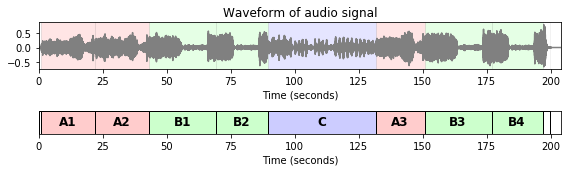

In [3]:
# Annotations
filename = 'FMP_C4_Audio_Brahms_HungarianDances-05_Ormandy.csv'
fn_ann = os.path.join('..', 'data', 'C4', filename)
ann, color_ann = read_structure_annotation(fn_ann, fn_ann_color=filename, Fs=1, remove_digits=False)

# Waveform
fn_wav = os.path.join('..', 'data', 'C4', 'FMP_C4_Audio_Brahms_HungarianDances-05_Ormandy.wav')
Fs = 22050
x, Fs = librosa.load(fn_wav, Fs) 
x_dur = x.shape[0]/Fs

# Visualization
fig, ax = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1], 
                                          'height_ratios': [1, 0.5]}, figsize=(8, 2.5))   
libfmp.b.plot_signal(x, Fs, ax=ax[0], title='Waveform of audio signal')

libfmp.b.plot_segments_overlay(ann, ax=ax[0], time_max=x_dur,
                print_labels=False,  label_ticks=False, edgecolor='gray',
                colors = color_ann, fontsize=10, alpha=0.1)
    
libfmp.b.plot_segments(ann, ax=ax[1], time_max=x_dur, 
                       colors=color_ann, time_label='Time (seconds)')
plt.tight_layout()

## Chromagram Representation

First, the [**chroma-based representation**](../C3/C3S1_SpecLogFreq-Chromagram.html) (see Section 3.1.2 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>) relates to **harmonic** and **melodic properties** of the music recording. The patterns visible in the chromagram reveal important structural information. For example, the four repeating $B$-part segments are clearly visible as four similar characteristic subsequences in the chromagram. Furthermore, the $C$-part segment stands out in the chromagram by showing a high degree of homogeneity throughout the entire section. Indeed, for all chroma features of this segment, most of the signal's energy is contained in the $\mathrm{G}$-, $\mathrm{B}$-, and $\mathrm{D}$-bands (which is not surprising since the $C$-part is in $\mathrm{G}$ major). In contrast, as for the $A$-part segments, many chroma vectors have dominant entries in the $\mathrm{G}$-, $\mathrm{B}^\flat$-, and $\mathrm{D}$-bands (which nicely reflects that this part is in $\mathrm{G}$ minor).

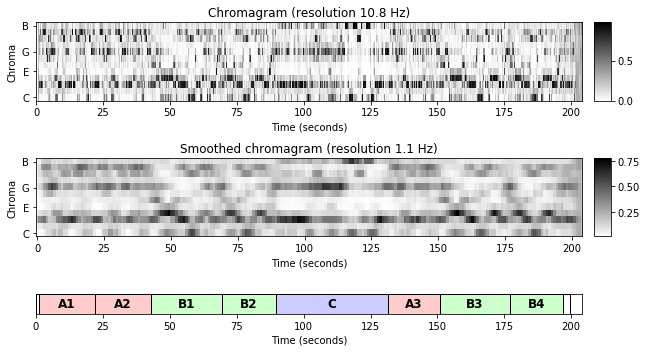

In [4]:
# Chromagram
N, H = 4096, 2048
chromagram = librosa.feature.chroma_stft(y=x, sr=Fs, tuning=0, norm=2, hop_length=H, n_fft=N)

filt_len = 41
down_sampling = 10
filt_kernel = np.ones([1,filt_len])
chromagram_smooth =  signal.convolve(chromagram, filt_kernel, mode='same')/filt_len
chromagram_smooth = chromagram_smooth[:,::down_sampling]
chromagram_smooth, Fs_smooth = \
    libfmp.c3.smooth_downsample_feature_sequence(chromagram, 
                        Fs/H, filt_len=filt_len, down_sampling=down_sampling)

# Visualization
fig, ax = plt.subplots(3, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                          'height_ratios': [2, 2, 0.5]}, figsize=(9, 5))       
libfmp.b.plot_chromagram(chromagram, Fs=Fs/H, ax=[ax[0,0], ax[0,1]],  
                         chroma_yticks = [0,4,7,11], 
                         title='Chromagram (resolution %0.1f Hz)'%(Fs/H), 
                         ylabel='Chroma', colorbar=True);
libfmp.b.plot_chromagram(chromagram_smooth, Fs_smooth, ax=[ax[1,0], ax[1,1]],  
                         chroma_yticks = [0,4,7,11], 
                         title='Smoothed chromagram (resolution %0.1f Hz)'%Fs_smooth, 
                         ylabel='Chroma', colorbar=True);
libfmp.b.plot_segments(ann, ax=ax[2,0], time_max=x_dur, 
                       colors=color_ann, time_label='Time (seconds)')
ax[2,1].axis('off')
plt.tight_layout()

## MFCC Representation

Besides melody and harmony, the instrumentation and timbral characteristics are of great importance for the human perception of music structure. In the context of timbre-based structure analysis, one often uses **mel-frequency cepstral coefficients** (MFCCs), which were originally developed for automated speech recognition. As for music, MFFC-based features are a mid-level representation that somehow correlate to aspects such as **instrumentation** and **timbre**. This is reflected by the following figure, where on can recognize that MFCC features within the $A$-part segments are different from the ones in the $B$-part and $C$-part segments. For many music recordings such as pop songs, where sections with singing voice alternate with purely instrumental or percussive sections, MFCC-based feature representations are well suited for novelty-based and homogeneity-based segmentation. For visualization purposes, we show in the following figure MFCC-based representations for coefficients $0$ to $19$ as well as for coefficients $4$ to $14$ (removing some of the very dominant lower coefficients).

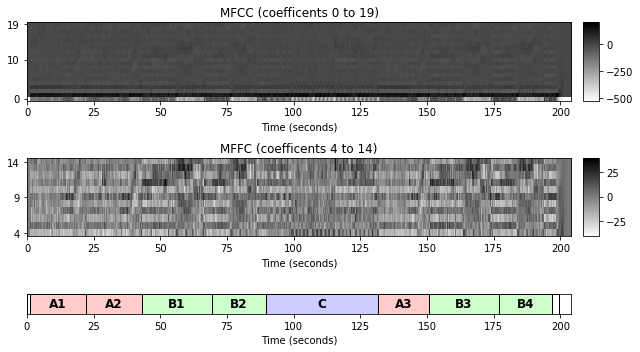

In [5]:
# MFCC
N, H = 4096, 2048
X_MFCC = librosa.feature.mfcc(y=x, sr=Fs, hop_length=H, n_fft=N)
coef = np.arange(4,15)
X_MFCC_upper = X_MFCC[coef,:]

# Visualization
fig, ax = plt.subplots(3, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                          'height_ratios': [2, 2, 0.5]}, figsize=(9, 5))       
libfmp.b.plot_matrix(X_MFCC, Fs=Fs/H, ax=[ax[0,0], ax[0,1]], 
                     title='MFCC (coefficents 0 to 19)', ylabel='', colorbar=True);
ax[0,0].set_yticks([0, 10, 19])
libfmp.b.plot_matrix(X_MFCC_upper, Fs=Fs/H, ax=[ax[1,0], ax[1,1]], 
                     title='MFFC (coefficents 4 to 14)', ylabel='', colorbar=True);
ax[1,0].set_yticks([0, 5, 10])
ax[1,0].set_yticklabels(coef[0] + [0, 5, 10])
libfmp.b.plot_segments(ann, ax=ax[2,0], time_max=x_dur, 
                       colors=color_ann, time_label='Time (seconds)');  
ax[2,1].axis('off')
plt.tight_layout()

## Tempogram Representation

In music structure analysis, tempo and beat information may also be used in combination with homogeneity-based segmentation approaches. Instead of extracting such information explicitly, a mid-level feature representation 
that correlates to tempo and rhythm may suffice for deriving a meaningful segmentation at a higher structural level. This is illustrated in the above Brahms example using a [**tempogram**](../C6/C6S2_TempoBeat.html)&mdash;a mid-level representation that encodes local **tempo information**. More precisely, a cyclic variant of a tempogram is shown, where tempi differing by a power of two are identified&mdash;similar to cyclic chroma features, where pitches differing by octaves are identified (see see Section 6.2.4 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>). Having a look at the tempogram representation, one can notice that the different musical parts are played in different tempi (even though the representation does not reveal the exact tempi). Furthermore, there are sections where the tempogram features do not have any dominating entries, which may indicate that there is no clear notion of a tempo in the recording.

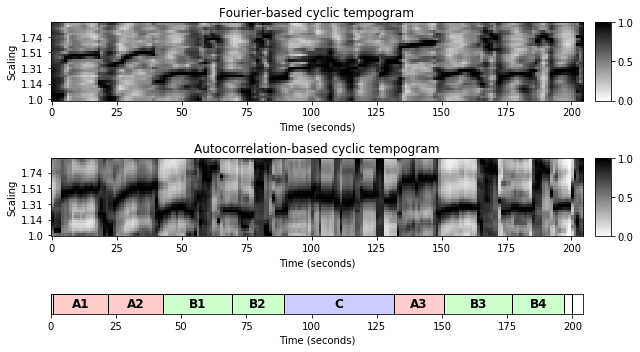

In [6]:
# Tempogram
nov, Fs_nov = libfmp.c6.compute_novelty_spectrum(x, Fs=Fs, N=2048, H=512, gamma=100, M=10, norm=True)
nov, Fs_nov = libfmp.c6.resample_signal(nov, Fs_in=Fs_nov, Fs_out=100)

X, T_coef, F_coef_BPM = libfmp.c6.compute_tempogram_fourier(nov, Fs_nov, N=1000, H=100, Theta=np.arange(30, 601))

octave_bin = 30
tempogram_F = np.abs(X)
output = libfmp.c6.compute_cyclic_tempogram(tempogram_F, F_coef_BPM, octave_bin=octave_bin)
tempogram_cyclic_F = output[0]
F_coef_scale = output[1]
tempogram_cyclic_F = libfmp.c3.normalize_feature_sequence(tempogram_cyclic_F, norm='max')

output = libfmp.c6.compute_tempogram_autocorr(nov, Fs_nov, N=500, H=100, norm_sum=False,
                                              Theta=np.arange(30, 601))
tempogram_A = output[0]
T_coef = output[1]
F_coef_BPM = output[2]

output = libfmp.c6.compute_cyclic_tempogram(tempogram_A, F_coef_BPM, octave_bin=octave_bin)
tempogram_cyclic_A = output[0]
F_coef_scale = output[1]
tempogram_cyclic_A = libfmp.c3.normalize_feature_sequence(tempogram_cyclic_A, norm='max')

# Visualization
fig, ax = plt.subplots(3, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                          'height_ratios': [2, 2, 0.5]}, figsize=(9, 5))       

libfmp.b.plot_matrix(tempogram_cyclic_F, T_coef=T_coef, ax=[ax[0,0], ax[0,1]], 
                     title='Fourier-based cyclic tempogram', ylabel='Scaling',
                     colorbar=True, clim=[0, 1])
libfmp.c6.set_yticks_tempogram_cyclic(ax[0,0], octave_bin, F_coef_scale, num_tick=5)

libfmp.b.plot_matrix(tempogram_cyclic_A, T_coef=T_coef, ax=[ax[1,0], ax[1,1]], 
                     title='Autocorrelation-based cyclic tempogram', ylabel='Scaling',
                     colorbar=True, clim=[0, 1])
libfmp.c6.set_yticks_tempogram_cyclic(ax[1,0], octave_bin, F_coef_scale, num_tick=5)

libfmp.b.plot_segments(ann, ax=ax[2,0], time_max=x_dur, 
                       colors=color_ann, time_label='Time (seconds)')
ax[2,1].axis('off')

plt.tight_layout()

## Further Notes

Besides the various musical dimensions, there is another aspect one should keep in mind when looking for suitable feature representations: the **temporal dimension**. In all of the above-mentioned feature representations, an analysis window is shifted over the music signal. Obviously, the length of the analysis window as well as the hop size parameter have a crucial influence on the quality of the feature representation. For example, long window sizes and large hop sizes may be beneficial for smoothing out irrelevant local variations, which is often a desired property in homogeneity-based segmentation. On the downside, the temporal resolution decreases and important details may get lost, which can lead to problems when locating the exact segmentation boundaries. 

In summary, a suitable choice of feature representations and parameter settings very much depends on the application context. Humans constantly and often unconsciously adapt themselves to the musical and acoustic characteristics of what they listen to. The richness and variety of musical structures make computational structure analysis a challenging problem.

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a>.
</div> 

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>